## CNN Model Implementation for Covid images

__Q1.Prepare the Dataset- Load the dataset into appropriate data structures, ensuring images are resized to 64x64x3 to be fed as input to the CNN.__

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Set the dataset directory path
data_dir = 'C:/Users/User/Downloads/'
train_val_dir = os.path.join(data_dir, 'train_validate')
test_dir = os.path.join(data_dir, 'test')

# Data preprocessing
image_size = (64, 64)
batch_size = 32

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1382 images belonging to 2 classes.
Found 345 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


__Q2.Build the CNN Model__ Using TensorFlow and Keras, create a CNN model with the following indicative architecture:

Convolution Layer → Activation Function (ReLU) → Pooling Layer  
(Convolution Layer → Activation Function) × 2 → Pooling Layer  
Fully Connected Layer → Activation Function Softmax Classifier  
Use a pool size of 2x2, filter size of 3x3, and any other standard parameters as needed.   

In [2]:
# CNN Model
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

__Q3. Train the Model__ Train the model for 70 epochs (E=70). Log and plot the following metrics for each epoch:  

Training Loss  
Training Accuracy  
Validation Loss  
Validation Accuracy  
Save these metrics and present them as a graph after training is complete.  

Epoch 1/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.7029 - loss: 0.5822 - val_accuracy: 0.9507 - val_loss: 0.1263
Epoch 2/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9318 - loss: 0.1761 - val_accuracy: 0.9478 - val_loss: 0.1277
Epoch 3/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9625 - loss: 0.1138 - val_accuracy: 0.9565 - val_loss: 0.1437
Epoch 4/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9655 - loss: 0.1023 - val_accuracy: 0.9594 - val_loss: 0.0990
Epoch 5/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9747 - loss: 0.0723 - val_accuracy: 0.9681 - val_loss: 0.0838
Epoch 6/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9814 - loss: 0.0462 - val_accuracy: 0.9710 - val_loss: 0.0711
Epoch 7/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9868 - loss: 0.0451 - val_accuracy: 0.9710 - val_loss: 0.0853
Epoch 8/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9909 - loss: 0.0301 - val_accuracy: 0.

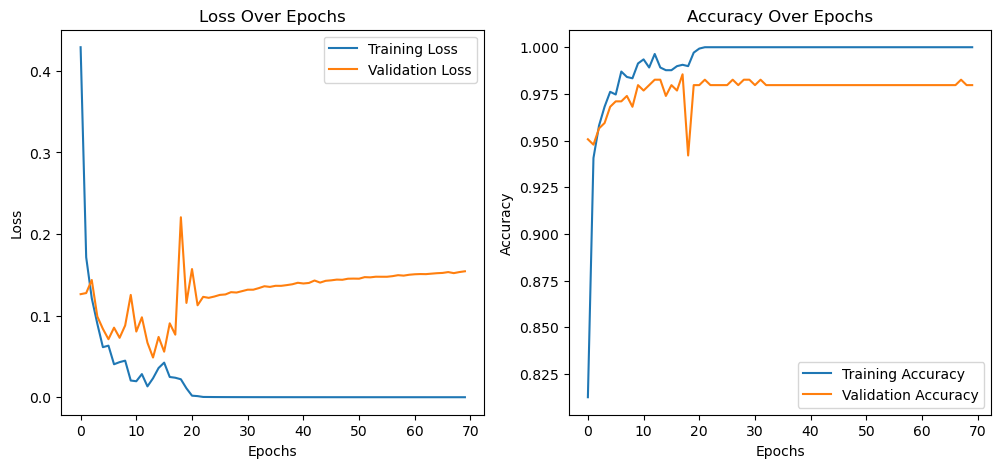

In [3]:
# Train the model
history = model.fit(
    train_generator,
    epochs=70,
    validation_data=validation_generator
)

# Plot metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


__Q4.Evaluate the Model__ -Test the trained CNN on the testing dataset and print the classification metrics, including precision, recall, and F1-score. 

In [4]:
# Evaluate the model
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Classification report
print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
Classification Report:
              precision    recall  f1-score   support

      masked       0.50      0.45      0.47       160
    unmasked       0.50      0.55      0.52       160

    accuracy                           0.50       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.50      0.50      0.50       320



__Q5. Model Improvement__  
Modify the default CNN model to improve its performance. For example, you may change hyperparameters, add layers, or use techniques like data augmentation.   
Compare the performance of the original ("default") and modified ("improved") models by plotting precision and recall side-by-side in a bar chart. 

Epoch 1/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.6053 - loss: 0.7669 - val_accuracy: 0.9333 - val_loss: 0.1812
Epoch 2/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9237 - loss: 0.2221 - val_accuracy: 0.9507 - val_loss: 0.1478
Epoch 3/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9557 - loss: 0.1365 - val_accuracy: 0.9710 - val_loss: 0.1129
Epoch 4/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9715 - loss: 0.1227 - val_accuracy: 0.9826 - val_loss: 0.0960
Epoch 5/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9625 - loss: 0.1033 - val_accuracy: 0.9797 - val_loss: 0.0917
Epoch 6/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.9667 - loss: 0.1055 - val_accuracy: 0.9739 - val_loss: 0.0757
Epoch 7/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.9692 - loss: 0.0745 - val_accuracy: 0.9623 - val_loss: 0.0966
Epoch 8/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9705 - loss: 0.0858 - val_accuracy: 0.

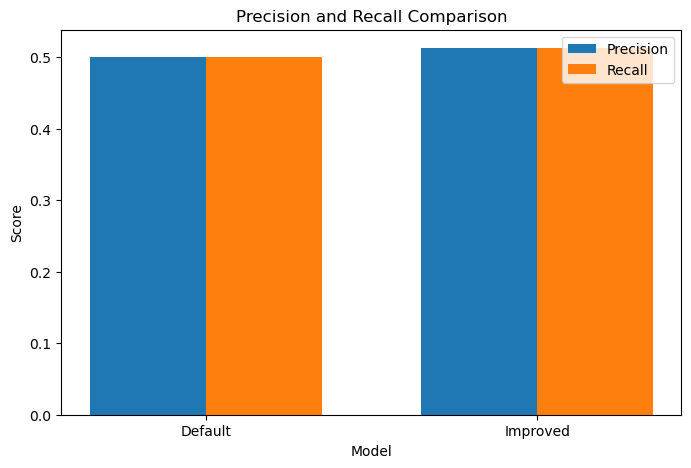

In [5]:
# Improved CNN Model
improved_model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout added for regularization

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Increased units
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

# Compile the improved model
improved_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the improved model
improved_history = improved_model.fit(
    train_generator,
    epochs=70,
    validation_data=validation_generator
)

# Evaluate the models
from sklearn.metrics import precision_score, recall_score

# Predictions for the default model (already computed)
default_precision = precision_score(y_true, y_pred_classes, average='weighted')
default_recall = recall_score(y_true, y_pred_classes, average='weighted')

# Predictions for the improved model
y_pred_improved = improved_model.predict(test_generator)
y_pred_improved_classes = np.argmax(y_pred_improved, axis=1)

improved_precision = precision_score(y_true, y_pred_improved_classes, average='weighted')
improved_recall = recall_score(y_true, y_pred_improved_classes, average='weighted')

# Classification report for improved model
print('Classification Report with Improved Model: \n')
print(classification_report(y_true, y_pred_improved_classes, target_names=test_generator.class_indices.keys()))

# Plot precision and recall comparison
labels = ['Default', 'Improved']
precision_scores = [default_precision, improved_precision]
recall_scores = [default_recall, improved_recall]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, precision_scores, width, label='Precision')
plt.bar(x + width/2, recall_scores, width, label='Recall')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()


__Q6.Visualize Predictions__  
Display 5 sample images from the test set predicted as "masked" and 5 predicted as "unmasked." Include the predicted labels for each image. 

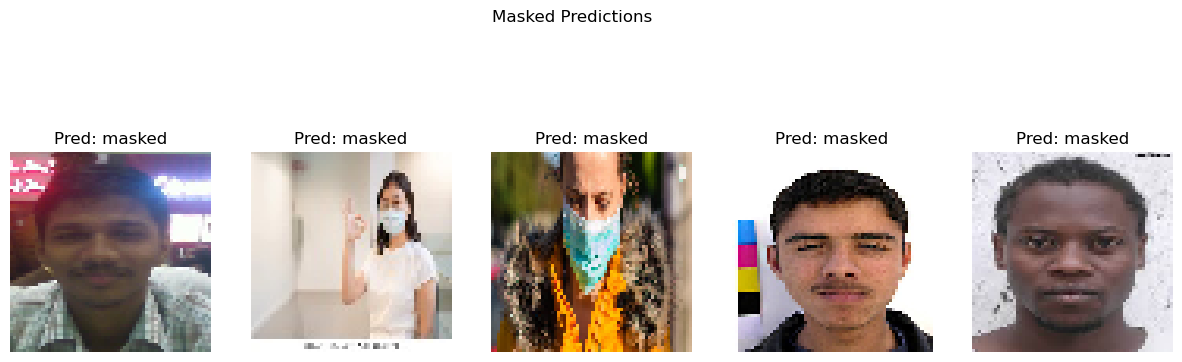

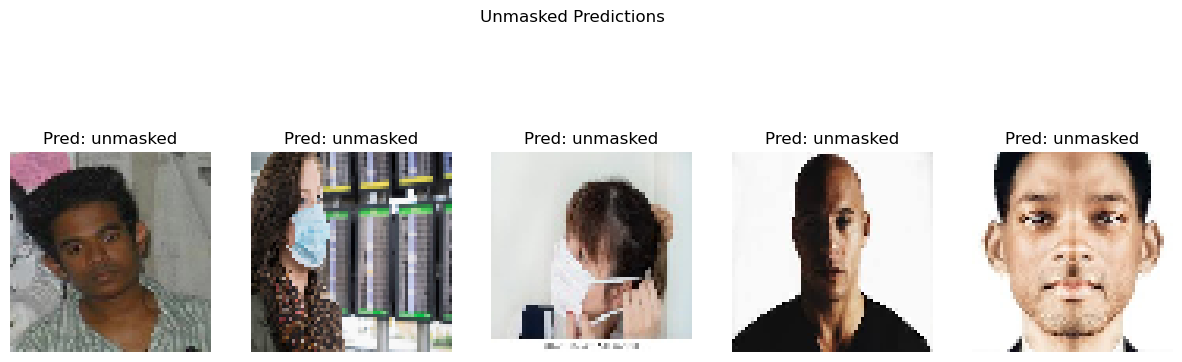

In [6]:
def display_sample_predictions(generator, predictions, class_labels, target_label, title):
    """
    Display sample images predicted as a specific class.
    """
    # Get indices where the prediction matches the target_label
    indices = np.where(predictions == target_label)[0][10:15]
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(indices):
        # Get the corresponding image from the generator
        image, label = generator[idx // generator.batch_size]
        image_index = idx % generator.batch_size  # Adjust index within the batch
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image[image_index])  # Display the specific image within the batch
        plt.title(f"Pred: {class_labels[target_label]}")
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Define class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Display masked and unmasked predictions
display_sample_predictions(test_generator, y_pred_improved_classes, class_labels, target_label=0, title="Masked Predictions")
display_sample_predictions(test_generator, y_pred_improved_classes, class_labels, target_label=1, title="Unmasked Predictions")
